In [1]:
import neuron
from neuron import h,rxd,gui2
print(neuron.__version__)


from neuron import h,rxd, gui
from neuron.units import ms, mV
import textwrap

7.7.2


#Step 2: Create a cell 

##Aside 1: NEURON's h.topology function
NEURON's h.topology() function displays the topological structure of the entire model, indicating which sections are connected to which sections, where they are connected, and how many segments each section is divided into.


load library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
image = np.load('data_from_19513019.npy')

(50000, 2)


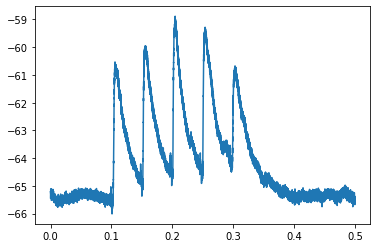

In [3]:
print(image.shape)
x = image[:,0]
y = image[:,1]
plt.plot(x,y)
plt.show()

# Our model

In [4]:
h.load_file('stdrun.hoc')


1.0

In [5]:
soma = h.Section(name='soma')
soma.L = 20
soma.diam = 20
soma.insert('hh')
dendrite = h.Section(name='dendrite')
dendrite.L = 500
dendrite.diam = 0.5
dendrite.nseg = 10
dendrite.insert('pas')
dendrite_1 = h.Section(name='dendrite_1')
dendrite_1.L = 100
dendrite_1.diam = 0.5
dendrite_1.nseg = 10
dendrite_1.insert('pas')
dendrite_2 = h.Section(name='dendrite_2')
dendrite_2.L = 100
dendrite_2.diam = 0.5
dendrite_2.nseg = 10
dendrite_2.insert('pas');

Connection

In [6]:
dendrite.connect(soma,1,0)
dendrite_1.connect(dendrite,1,1)
dendrite_2.connect(dendrite,1,1);

In [7]:
h.topology()


|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)



1.0

Insert an alpha synaspe

Alpha synaspe 

In [8]:
h.load_file('stdrun.hoc')

s = h.NetStim()



In [9]:
c = np.linspace(0.1,1,10)
for a in c:
    for i in range(10):
        asyn = h.AlphaSynapse(a,sec = dendrite)
        asyn.onset = 10
        asyn.gmax = 20
        s.interval =50
        s.number=5
        s.noise=0
        s.start=100
        stim = h.NetCon(s,asyn)
        h.finitialize(-70 * mV)
        h.run(500)
        v = h.Vector().record(soma(0.5)._ref_v)            
        t = h.Vector().record(h._ref_t)  
        #h.tstop = 500
        ax=plt.subplot(5, 2, i+1)
        ax.plot(t,v)
    
ax.set_xlabel('time (ms)')
ax.set_ylabel('mV')
plt.show()

NEURON: No NET_RECEIVE in target PointProcess: AlphaSynapse[0]
 near line 0
 ^
        NetCon(..., ...)


RuntimeError: hoc error

In [ ]:
v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

In [ ]:
h.tstop = 500
h.run()

In [ ]:
for i in range(0,len(c)):
    ax=plt.subplot(5, 2, i+1)
    ax.plot(t_vec,v_vec)
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('mV')


plt.show()

In [ ]:

plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)
plt.xlabel('time (ms)')
plt.xlim(0,500)
plt.ylabel('mV')
plt.show()

In [ ]:
x1 = image[1000:,0]
y1 = image[1000:,1]

In [ ]:
v = h.Vector([0, 0])
def efun(v):
  return (v[0] + v[1] ) ** 2 + (v[0] - v[1]) ** 2  
h.attr_praxis(1e-5, 0.5, 0)
e = h.fit_praxis(efun, v)
print("e=%g x=%g y=%g\n"%(e, v[0], v[1]))
